# **Exercise 1: Data Exploration and Preprocessing**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **1. Loading the datasets**

In [4]:
data = pd.read_csv('customer_segmentation.csv')

# **2. Data Exploration**

In [5]:
print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


**Check for missing values**

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


**Handle missing values**

In [7]:
data.fillna(data.mean(), inplace=True)

**Distribution features**

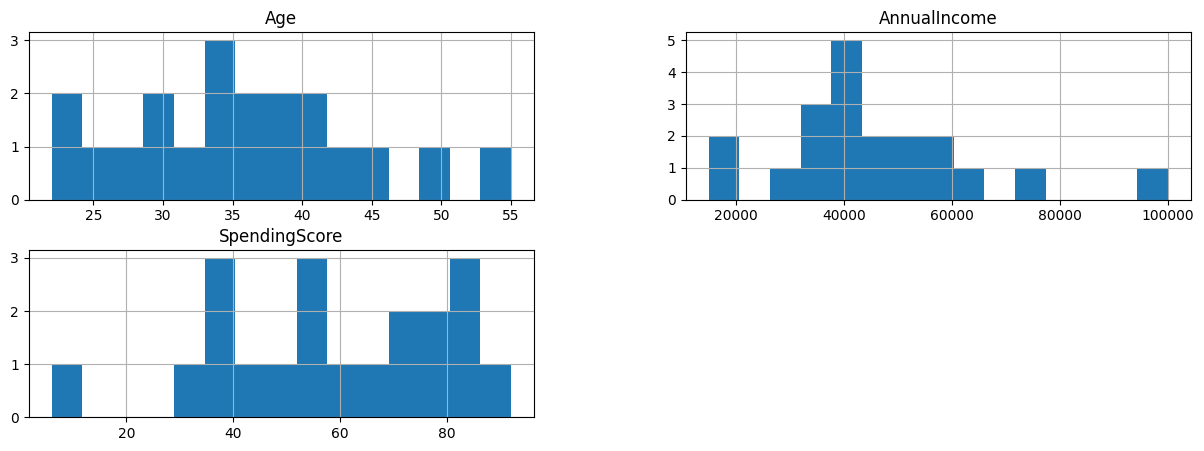

In [9]:
features = ['Age', 'AnnualIncome', 'SpendingScore']
data[features].hist(bins=15, figsize=(15, 5))
plt.show()

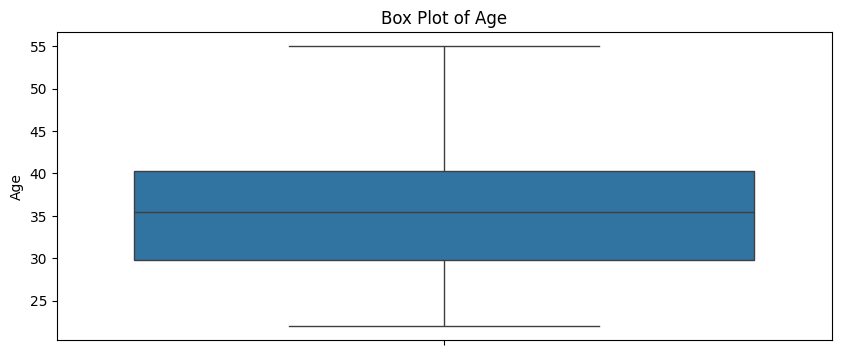

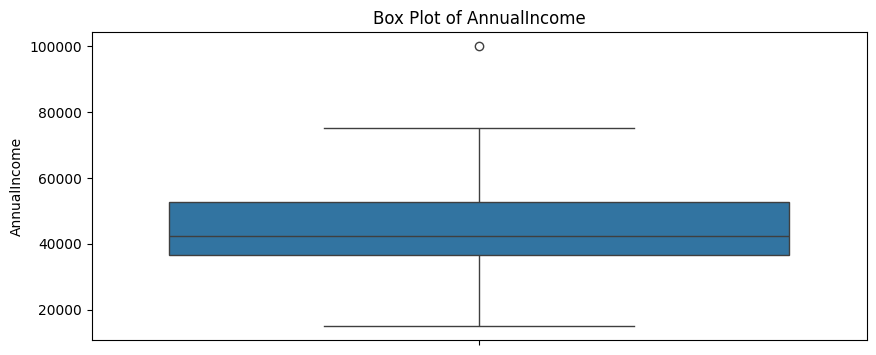

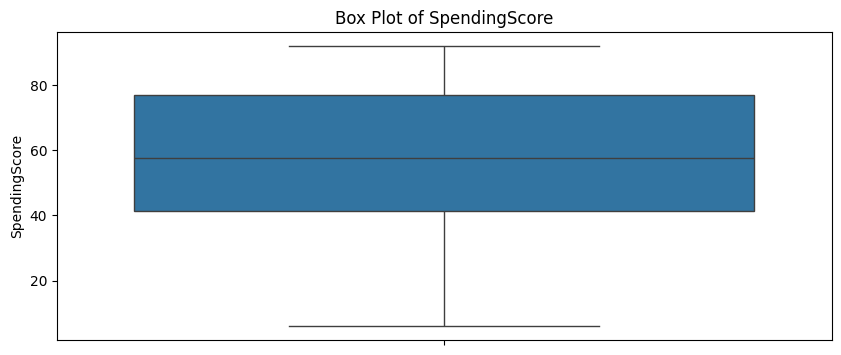

In [10]:
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# **3. Data Normalization**

In [11]:
scaler = StandardScaler()

In [12]:
data[features] = scaler.fit_transform(data[features])

# **Exercise 2: Implementing K-Means Clustering**

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# **Model Implementation**

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

# 2. Choosing Optimal **k**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

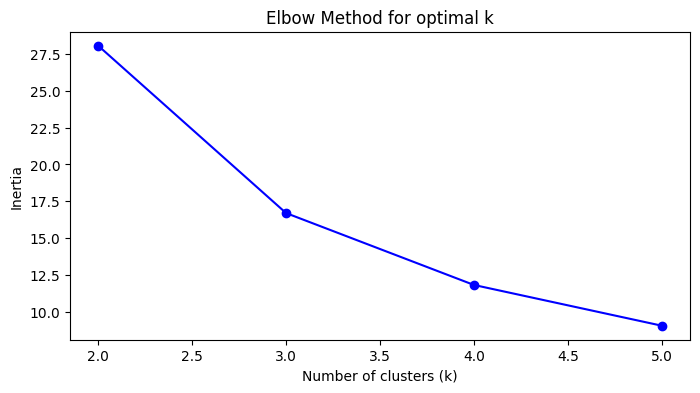

In [18]:
ks = range(2, 6)
inertias = []

for k in ks:

   kmeans = KMeans(n_clusters=k, random_state=42)

   kmeans.fit(data[features])
   inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(ks, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal k')
plt.show()


# **3. Cluster Visualization**

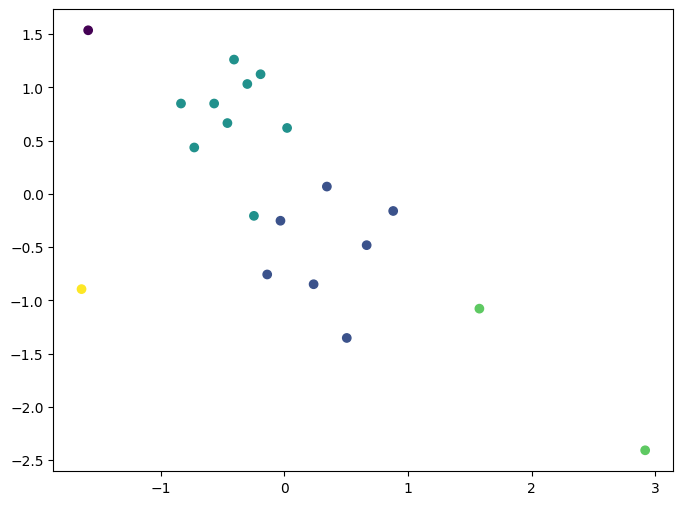

In [26]:
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=labels, cmap='viridis')

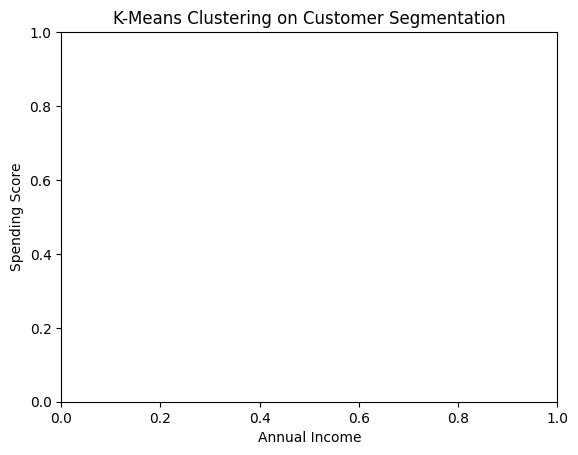

In [29]:
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering on Customer Segmentation')

plt.show()

# **Exercise 3: Model Evaluation**

In [30]:
from sklearn.metrics import silhouette_score


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

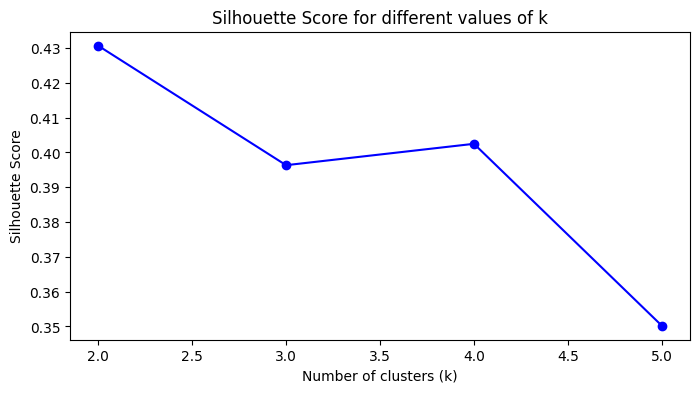

In [34]:
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data[features])
    score = silhouette_score(data[features], labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(ks, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.show()

In [35]:
for k, score in zip(ks, silhouette_scores):
    print(f'Silhouette Score for k={k}: {score}')

Silhouette Score for k=2: 0.4306792532260083
Silhouette Score for k=3: 0.39635035707595223
Silhouette Score for k=4: 0.40249159458531514
Silhouette Score for k=5: 0.3502203789488605


# **2. Cluster Analysis**

In [41]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[features])

cluster_analysis = data.groupby('Cluster').agg({
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'Age': 'mean'
}).reset_index()

print(cluster_analysis)

   Cluster  AnnualIncome  SpendingScore       Age
0        0     -0.631899       0.661100 -0.686003
1        1      2.247238      -1.743468  2.006667
2        2      0.350916      -0.540737  0.504671


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# **Exercise 4: Interpretation and Reporting**

# **Cluster Interpretation:**

After applying K-Means clustering on customer segmentation dataset, we have got three clusters. Customers who have high income and low spending are clustered in cluster 0 , they have high financial potential but they spend less so maybe they are more interested in saving money. Young customers with high spending are in cluster 1, This is the most suitable group for marketing promotions because these people are likely to be impulsive buyers and interested in lifestyle and luxury. Cluster 2 consists of middle aged customers with average salary and an average spending score, hence I think different marketing strategies can be adopted to target this category of customers to improve their customer loyalty as well as increasing their spendings.

# **Report:**

The data exploration process starts with loading the dataset, checking if there is any missing value and visualizing some important features like Age, Annual Income and Spending Score with the help of histograms and boxplots. Then we fill in missing values if there exist some. After that, we normalize all feature values so that each feature contributes approximately proportionately to the final distance calculation during clustering. Next we run K-Means clustering for a sequence of values of k (k=2 to 5) and use the famous Elbow Method to identify which value of k to use. In this case, we find that the elbow point locates at k=3 as shown on the inertia plot. Moreover, silhouette scores also suggest that k=3 gives us the best cluster quality.



# **Insights or Observations from the Clustering Analysis:**

Finding similarities in the data revealed several client categories that could affect a marketing plan. Suggestions are Cluster 0 could attract investments or expensive products to further grow this high-earning but low-spending customer base. They fit into Cluster 1, which is ideal for high-end, younger-targeted lifestyle experiences and activities that are ready for advertising. In conclusion, strategies centered around building customer loyalty through rewards or customized advertising campaigns could potentially stimulate additional spending from the middle-class clients in Cluster 2.


# **Visualizations:**

The study provides multiple graphs that demonstrate the clustering process. The Elbow Method plot is used to find the perfect amount of clusters, and the silhouette scores plot indicates your level of confidence in terms of the correct smallest average difference between clusteric groups for different amounts of k. Also, the cluster scatter plot displays the distribution of consumers according to their spending score and annual income, clearly showing the three categories that are based on income levels and how much they spend.
